#Import libraries and MNIST fashion dataset

In [ ]:
#Import libraries
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#Import the fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Loading the dataset returns four Numpy arrays:

*   The `train images` and `train labels` arrays are the training set - the data that the model uses to learn. 
*   The `test images` and `test label` arrays are the test set.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Classs</th>
  </tr>
  <tr>
    <th>0</th>
    <th>T-shirt/Top</th>
  </tr>
  <tr>
    <th>1</th>
    <th>Trouser</th>
  </tr>
  <tr>
    <th>2</th>
    <th>Pullover</th>
  </tr>
  <tr>
    <th>3</th>
    <th>Dress</th>
  </tr>
  <tr>
    <th>4</th>
    <th>Coat</th>
  </tr>
  <tr>
    <th>5</th>
    <th>Sandal</th>
  </tr>
  <tr>
    <th>6</th>
    <th>Shirt</th>
  </tr>
  <tr>
    <th>7</th>
    <th>Sneaker</th>
  </tr>
  <tr>
    <th>8</th>
    <th>Bag</th>
  </tr>
  <tr>
    <th>9</th>
    <th>Ankle Boot</th>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [ ]:
class_name = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

#Explore the dataset

Let's explore the format of the dataset before training the model


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Preprocess the data


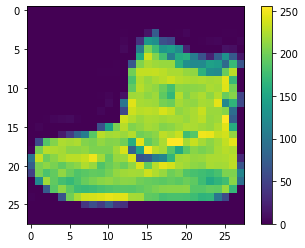

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

As you can see, the pixel values fall in the range of 0 to 255.



We need to scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide them to 255.

In [ ]:
train_images = train_images / 255.0
 
test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

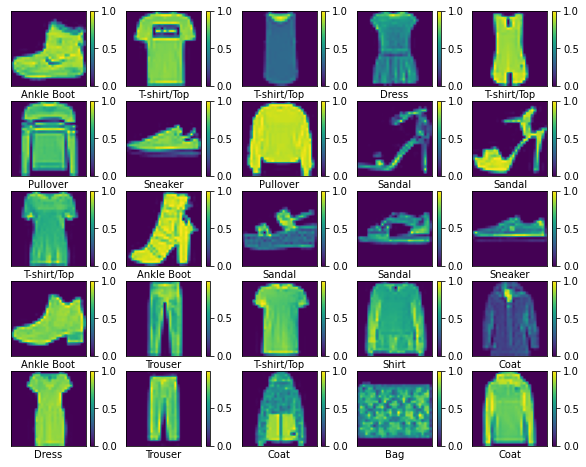

In [ ]:
plt.figure(figsize = (10, 8))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i])
  plt.colorbar()
  plt.grid(False)
  plt.xlabel((class_name[train_labels[i]]))
plt.show()

#Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), #transform the format of the image from two-dimensional array to one-dimensional array
    tf.keras.layers.Dense(128, activation = 'relu'), 
    tf.keras.layers.Dense(10)
])

#Compile the model
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:


*   `Loss Function`: This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
*   `Optimizer`: This is how the model is updated based on the data it sees and its loss function.
*   `Metrics`: Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.





In [ ]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

#Train the model

In [ ]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5010 - accuracy: 0.8238
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3772 - accuracy: 0.8652
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3366 - accuracy: 0.8782
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3103 - accuracy: 0.8867
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2948 - accuracy: 0.8912
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2788 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2655 - accuracy: 0.9017
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2566 - accuracy: 0.9057
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2470 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.236

#Evaluate the accuracy

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose = 2)

print('Test accuracy: ', test_accuracy)

313/313 - 1s - loss: 0.3400 - accuracy: 0.8796 - 638ms/epoch - 2ms/step
Test accuracy:  0.8795999884605408


#Make predictions 
With the model trained, you can use it to make predictions about some images. Attach a softmax layer to convert the model's linear outputs—logits—to probabilities, which should be easier to interpret.

In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predictions[0]

array([2.1301372e-07, 1.1662498e-09, 8.6138250e-08, 8.4294566e-10,
       1.1944806e-07, 1.1553464e-02, 1.4103927e-07, 2.2503478e-02,
       1.1892969e-06, 9.6594143e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
class_name[np.argmax(predictions[0])]

'Ankle Boot'

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label = true_label[i]
  img = img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label], 
                                       100 * np.max(predictions_array),
                                       class_name[true_label]),
                                       color = color
            )
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#777777')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  

#Verify Predictions

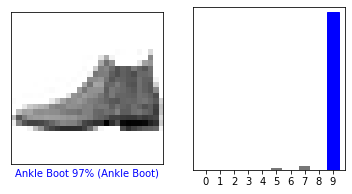

In [ ]:
i = 0
plt.figure(figsize = (6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

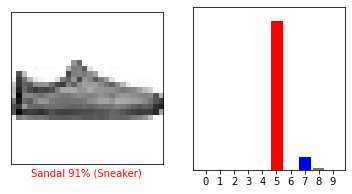

In [ ]:
i = 12
plt.figure(figsize = (6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

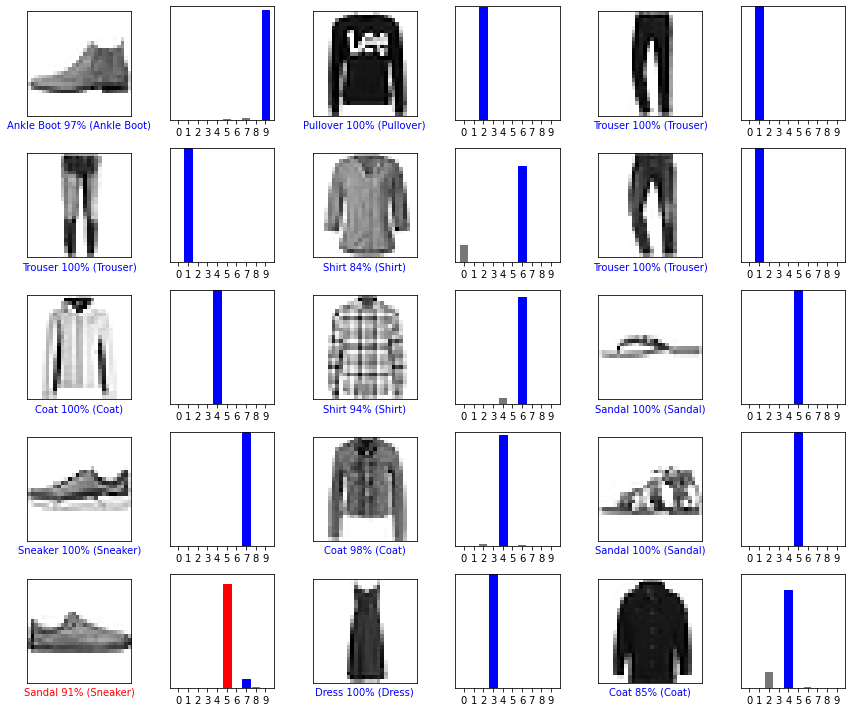

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols 
plt.figure(figsize = (2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

#Use the trained model

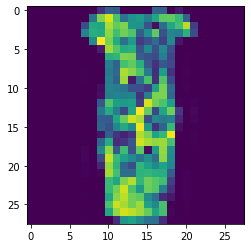

In [ ]:
img = test_images[100]

plt.imshow(img)

In [ ]:
img.shape

(1, 28, 28)

In [ ]:
img = (np.expand_dims(img, 0))

img.shape

(1, 28, 28)

In [ ]:
  predictions_single = probability_model.predict(img) 
  class_name[np.argmax(predictions_single)] 

1/1 [==============================] - 0s 18ms/step


'Dress'

In [ ]:
print(predictions_single)

[[2.0031589e-03 1.5172362e-05 6.8254441e-05 9.9591511e-01 2.3534883e-06
  1.5328366e-06 1.9934101e-03 9.0342005e-11 8.9069391e-07 1.0898423e-07]]


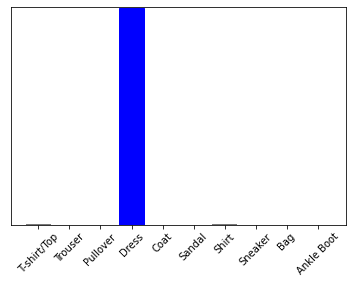

In [ ]:
plot_value_array(100, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_name, rotation = 45)
plt.show()